<a href="https://colab.research.google.com/github/jeamsden/Kitchener_Crime_Open_Data_Join_to_Shape_Demo/blob/master/Kitchener_Crime_Open_Data_Join_to_Shape_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [58.0 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

CPU times: user 1.72 s, sys: 290 ms, total: 2.01 s
Wall time: 4min 15s


Demonstrate one way to find points within a shape using a mixture of geojson (from a shape file) and csv with coordinates are a string (from csv.)

Using geopandas to read geojson, pandas to read csv, and shapely to convert x y coordinates to a geometry point.

In [0]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [0]:
%matplotlib inline

Using Region of Waterloo's Open Data Cities and Towns dataset from:
https://open-kitchenergis.opendata.arcgis.com/datasets/RMW::cities-and-towns

In [0]:
region = gpd.read_file('https://opendata.arcgis.com/datasets/b039c8ffa93841cd8add31ef7f10f4cb_16.geojson')

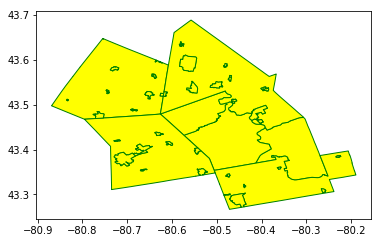

In [0]:
region_plot = region.plot(color='yellow', edgecolor='green')

Set the coordinate reference system (This is noted in the dataset geojson)

In [0]:
region = region.to_crs({'init': 'epsg:26917'})

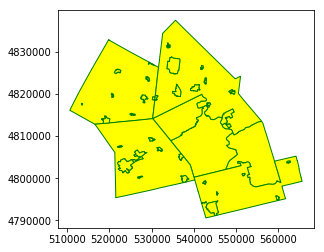

In [0]:
region_plot = region.plot(color='yellow', edgecolor='green')

Retain Kitchener shape from Cities and Towns dataset as a geopandas dataframe

In [0]:
kitchener = region[region.Municipality == 'City of Kitchener']

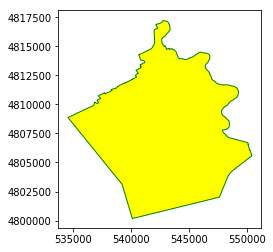

In [0]:
kitchener_plot = kitchener.plot(color='yellow', edgecolor='green')

Using WRPS Open Data Crime Dataset from: https://www.wrps.on.ca/en/about-us/occurrence-data.aspx as a pandas dataframe

In [0]:
crime_2017 = pd.read_csv('https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2017__August_28_2018.csv')

Turn Geographic Location string into x y columns.

In [0]:
crime_2017['x'] = pd.to_numeric(crime_2017['Geographic Location'].str.split(' ,').str[0])
crime_2017['y'] = pd.to_numeric(crime_2017['Geographic Location'].str.split(' ,').str[1])

Create the crime geopandas dataframe from the pandas dataframe with geometry from the x y columns.

In [0]:
crime = gpd.GeoDataFrame(
    crime_2017.drop(['Geographic Location'], axis=1),
    crs={'init': 'epsg:26917'},
    geometry=[Point(xy) for xy in zip(crime_2017.x, crime_2017.y)])

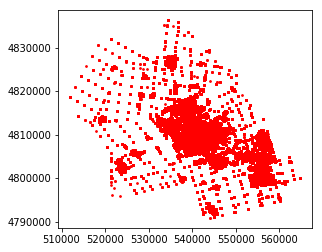

In [0]:
crime_plot = crime.plot(marker='o', color='red', markersize=3)

Join datasets together, keeping points within Kitchener shape

In [0]:
kitchener_crimes_2017 = gpd.sjoin(crime, kitchener, how='inner', op='within')

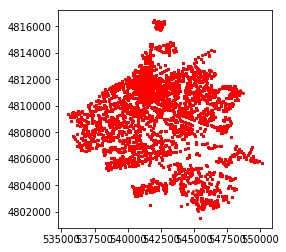

In [0]:
kitchener_crimes_2017_plot = kitchener_crimes_2017.plot(marker='o', color='red', markersize=3)

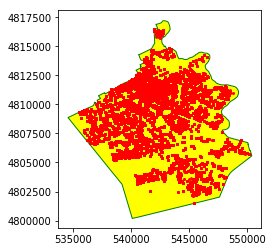

In [0]:
kitchener_plot = kitchener.plot(color='yellow', edgecolor='green')
kitchener_crimes_2017_plot_alt = kitchener_crimes_2017.plot(ax=kitchener_plot, marker='o', color='red', markersize=3)